# Sensitivity of results for cost factor water transport

## Relative errors mean annual fluxes


In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

<Figure size 1280x400 with 0 Axes>

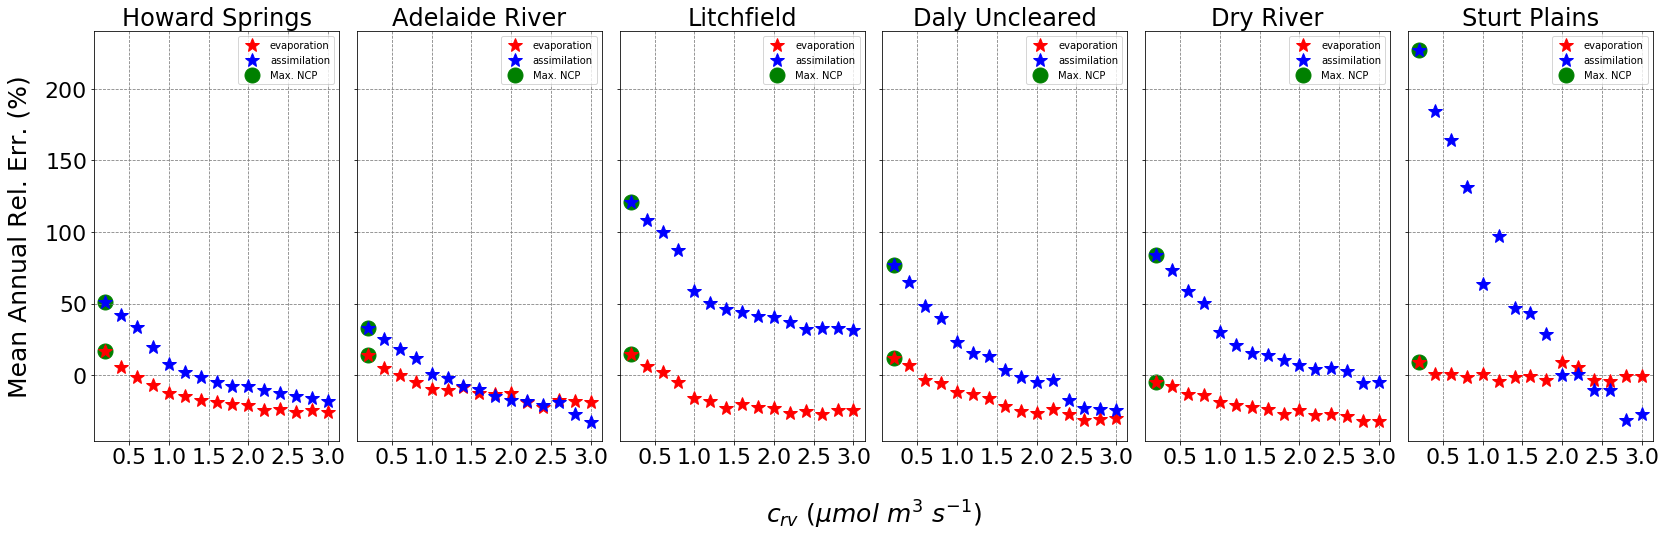

In [3]:

#load data
cpcff_vals = np.arange(0.2, 3.2, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]
site_names = ["Howard Springs", "Adelaide River", "Litchfield", "Daly Uncleared", "Dry River", "Sturt Plains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=6, figsize=(24, 8), sharex=True, sharey=True) 


i = 0

skipped = 0
#loop over all sites
for site in study_sites:
  
    
    loc = 1
    i_cpcff = 0
    NCPmax = 0
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        

            infile = ["../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_best/results_daily.txt"]
            #get NCP-value
            data = np.genfromtxt(infile[0], names=True)
            
            if( (np.sum(data["ncp_g"]) + np.sum(data["ncp_t"])) > NCPmax ):
                NCPmax = np.sum(data["ncp_g"]) + np.sum(data["ncp_t"])
                cpcff_ncpmax = cpcff_vals[i_cpcff]
                reass_ncpmax = assbest_stats[1]*100
                ree_ncpmax = ebest_stats[1]*100
                
            if(loc  == 1):
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1]*100, '*r', markersize=15, label="evaporation" ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1]*100, '*b', markersize=15, label="assimilation" )
            else:
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1]*100, '*r', markersize=15 ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1]*100, '*b', markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
    ax[i].set_title(site_names[i], size=24  );

    #plot solutions with highest NCP-value
    ax[i].plot(cpcff_ncpmax, reass_ncpmax, 'o', color = "green", markersize=15, label="Max. NCP", zorder=0 ) 
    ax[i].plot(cpcff_ncpmax, ree_ncpmax, 'o', color = "green", markersize=15, zorder=0) 

    ax[i].grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    ax[i].legend();

    i = i +1


fig.add_subplot(111, frameon=False);
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'$c_{rv}$ ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.tight_layout()
plt.show()



**Figure S3.1.** Relative errors for mean annual fluxes, for different values of the costfactor for water transport and the different study sites, with assimilation in blue, total evaporation in red, the solution with the highest NCP is marked in green. The relative errors go down for higher values of the costfactor in most cases. The smallest relative error seems to be between 0.6 and 1.2 $\mu mol m^3 s^{-1}$. At least, for most study sites several values approach zero, or change sign and cross the zero-axis. SturtPlains still shows a large offset for the assimilation. 


## Timeseries of evaporation

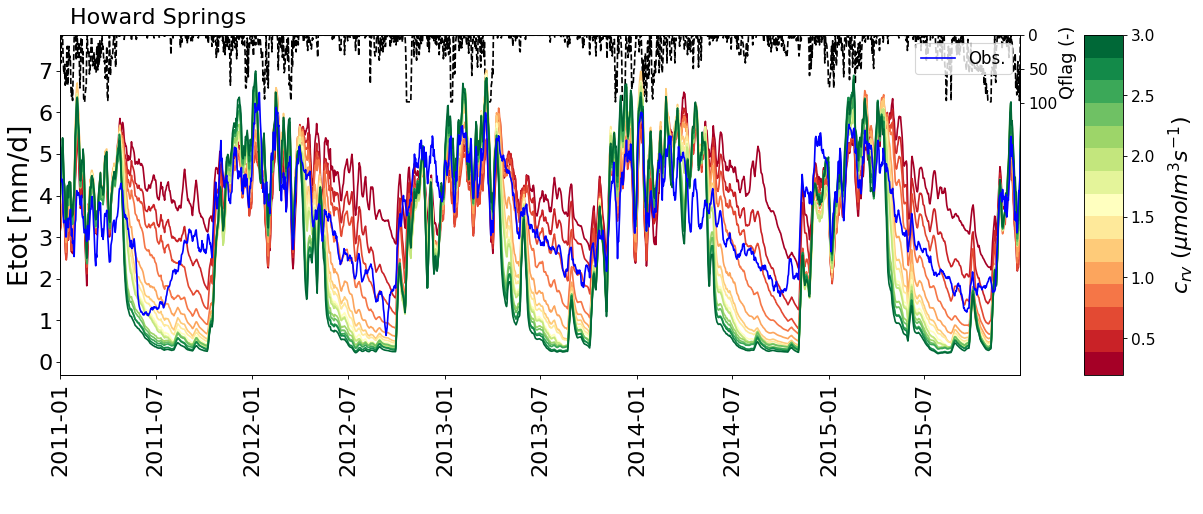

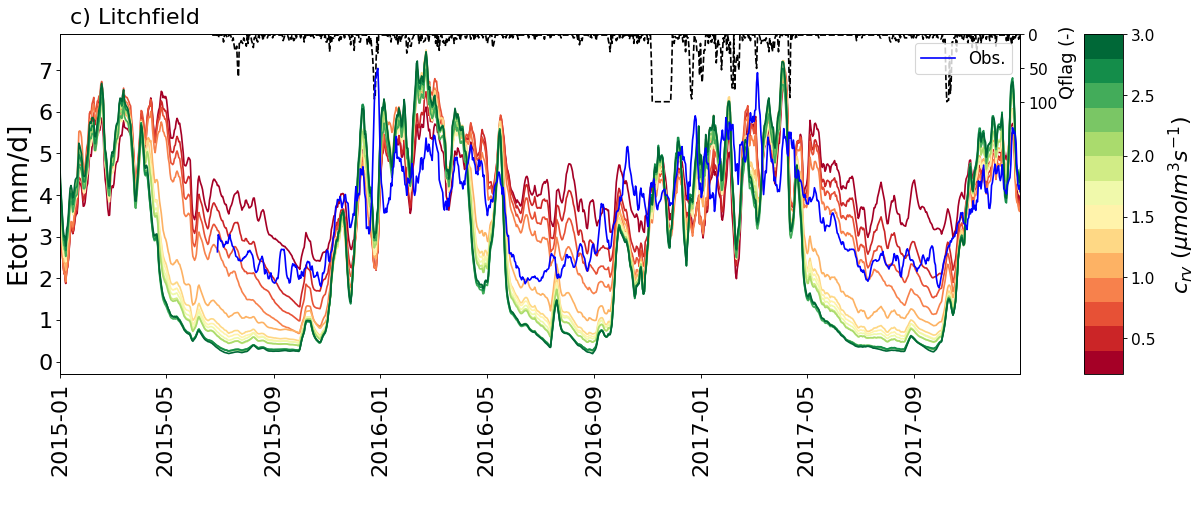

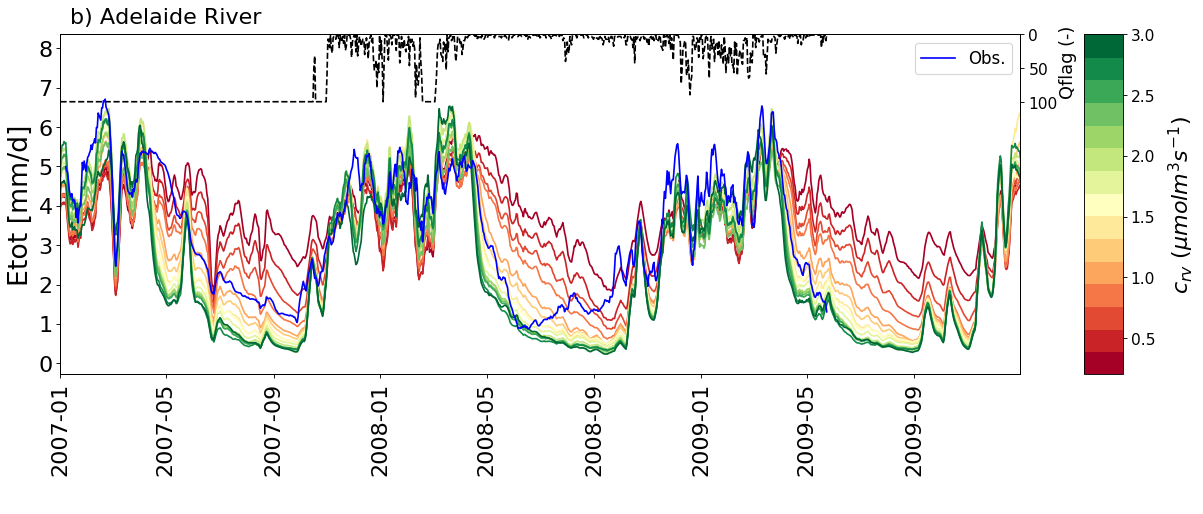

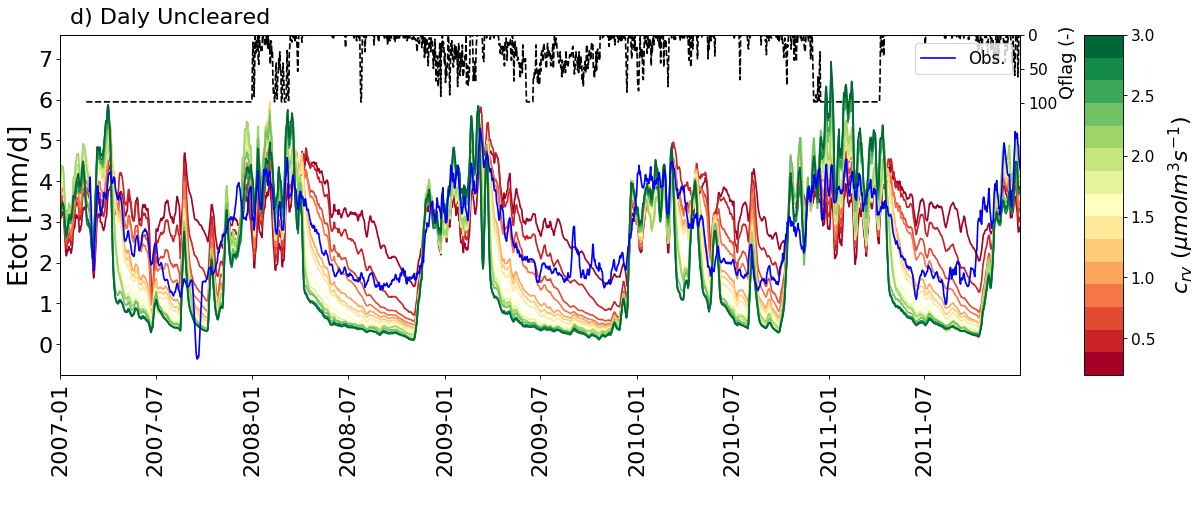

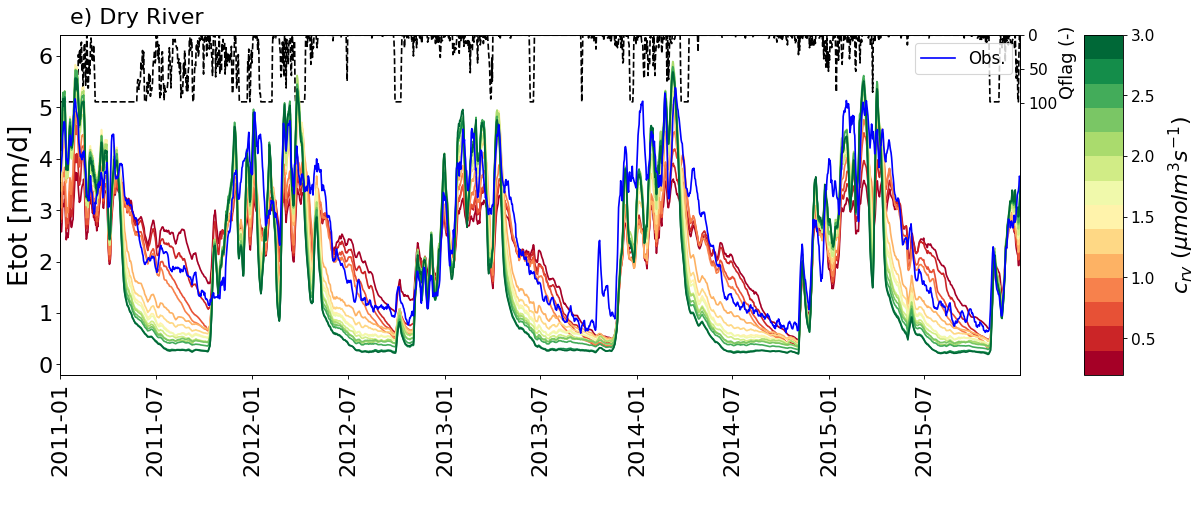

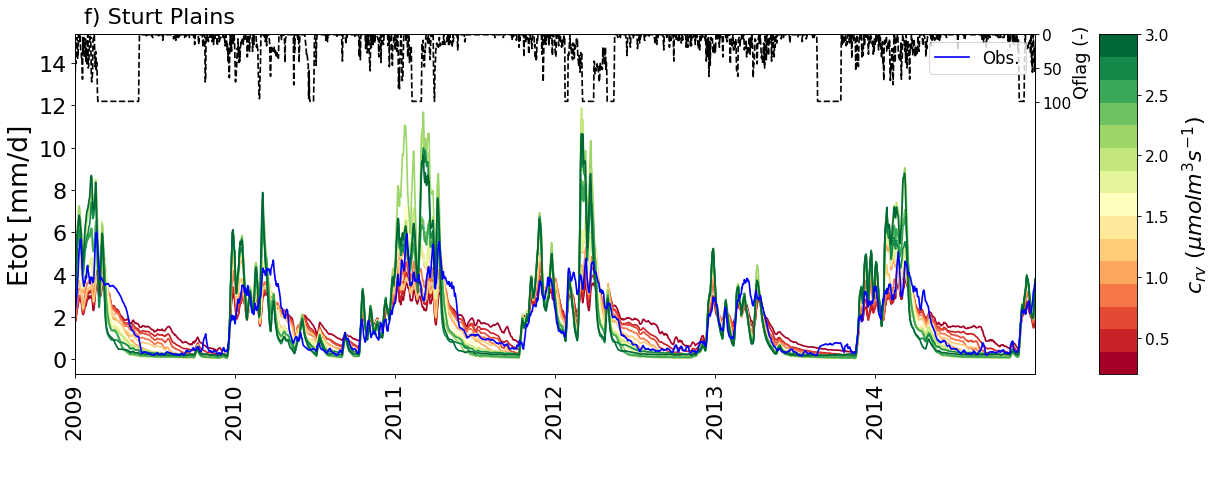

In [4]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$" --labels VOM VOM2 \
--title "Howard Springs" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette RdYlGn --moving_average 7

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/Ea_litch.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "c) Litchfield" --legend True --obs_qc ../../data/DINGO_QC/FeQ_litch.txt \
--palette RdYlGn --moving_average 7
 

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "b) Adelaide River" --legend True --obs_qc ../../data/DINGO_QC/FeQ_adelaide.txt \
--palette RdYlGn --moving_average 7


#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "d) Daly Uncleared" --legend True --obs_qc ../../data/DINGO_QC/FeQ_daly.txt \
--palette RdYlGn --moving_average 7

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "e) Dry River" --legend True --obs_qc ../../data/DINGO_QC/FeQ_dry.txt \
--palette RdYlGn --moving_average 7


#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "f) Sturt Plains" --legend True --obs_qc ../../data/DINGO_QC/FeQ_sturt.txt \
--palette RdYlGn --moving_average 7


**Figure S3.2.** Timeseries of total evaporation for the different sites (a-f) with in blue the fluxtower observations and the VOM-results for different values of the costfactor for water transport (color scale). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. Generally, there is a reasonable fit for most values of the cost factor with the observations, similar as the plots of relative errors suggest. However, in the transition from the wet to the dry season, a stronger off-set appears for the modelled evaporation. There are hardly any differences for the different costfactors during the wet season.

## Timeseries of assimilation

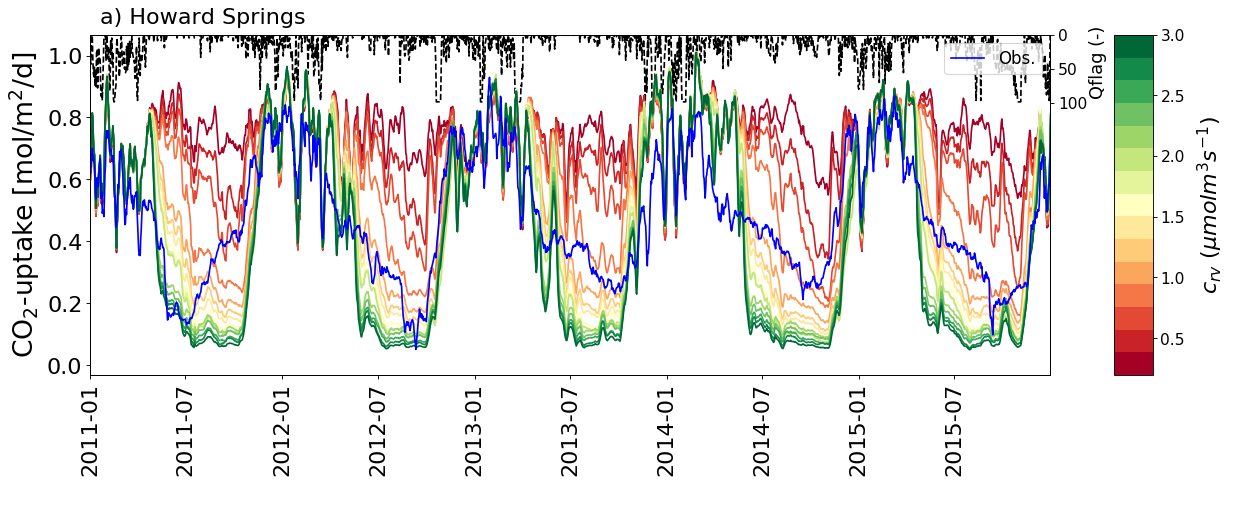

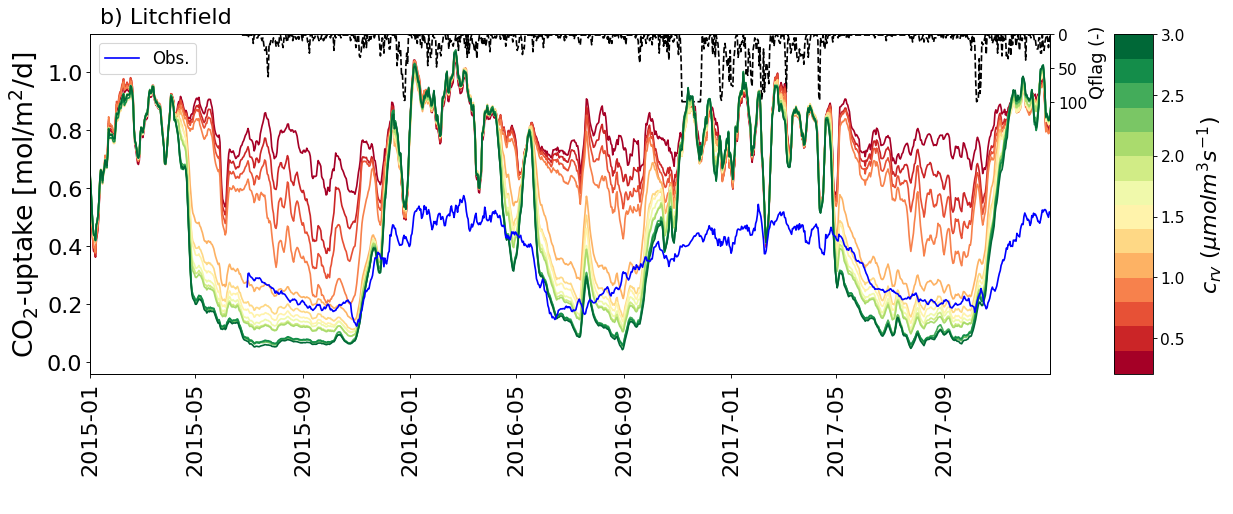

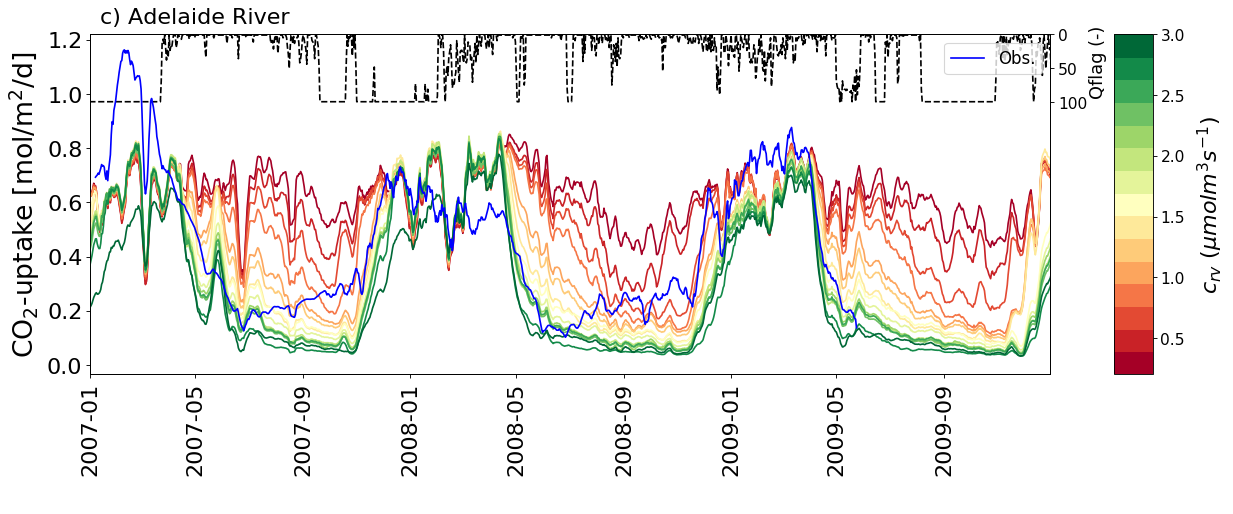

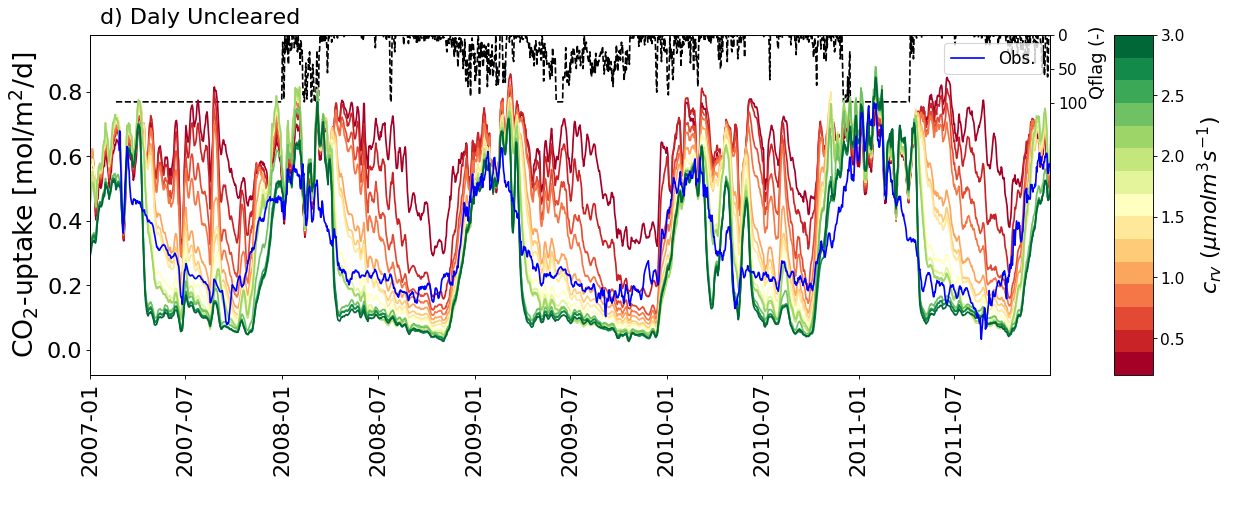

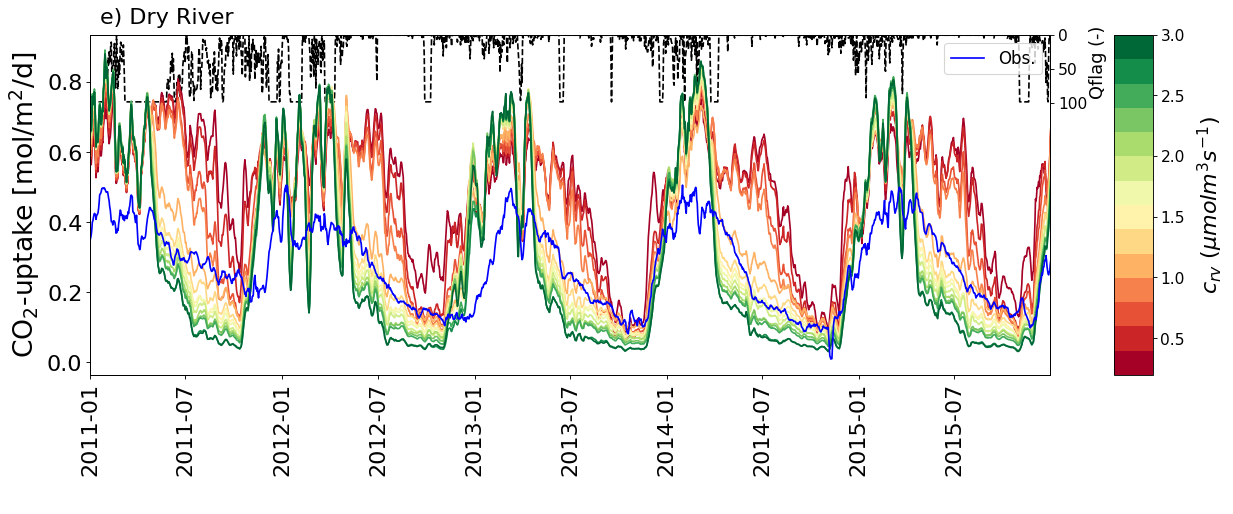

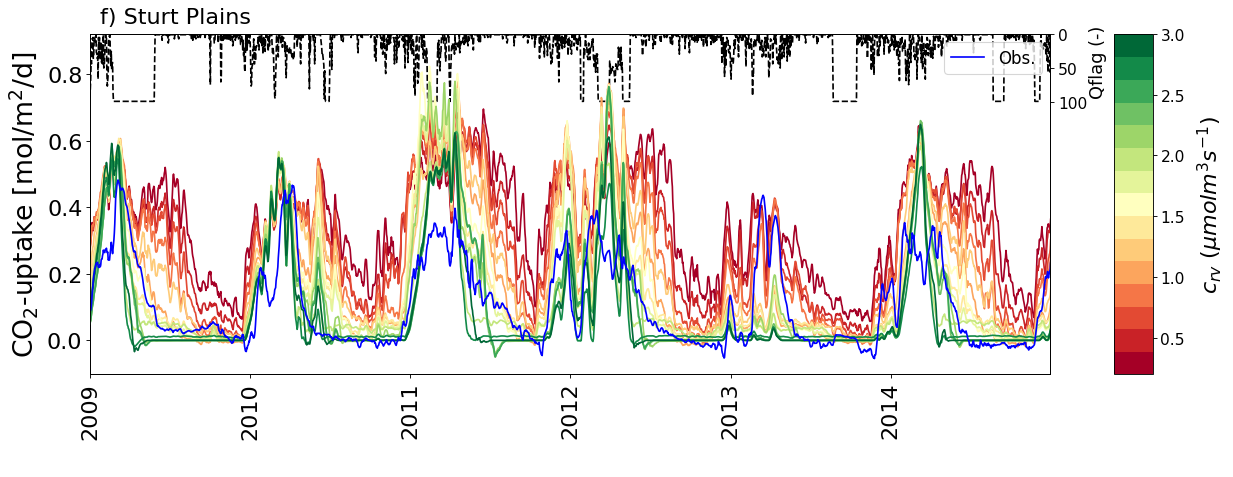

In [5]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "a) Howard Springs" --legend True --cbar_max 3.0 --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette RdYlGn --moving_average 7

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_litch.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "b) Litchfield" --legend True --cbar_max 3.0 --obs_qc ../../data/DINGO_QC/FcQ_litch.txt\
--palette RdYlGn --moving_average 7


#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "c) Adelaide River" --legend True --cbar_max 3.0 --obs_qc ../../data/DINGO_QC/FcQ_howard.txt\
--palette RdYlGn --moving_average 7


#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "d) Daly Uncleared" --legend True --cbar_max 3.0 --obs_qc ../../data/DINGO_QC/FcQ_daly.txt\
--palette RdYlGn --moving_average 7

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "e) Dry River" --legend True --cbar_max 3.0 --obs_qc ../../data/DINGO_QC/FcQ_dry.txt\
--palette RdYlGn --moving_average 7

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "f) Sturt Plains" --legend True --cbar_max 3.0 --obs_qc ../../data/DINGO_QC/FcQ_sturt.txt \
--palette RdYlGn --moving_average 7


**Figure S3.3.** Timeseries of total assimilation for the different sites (a-f) with in blue the fluxtower observations and the VOM-results for different values of the costfactor for water transport (color scale). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. Generally, there is a reasonable fit for most values of the cost factor with the observations. However, for low values of the costfactor the assimilation is stronly overestimated during the dry season, for high values there is often an underestimation of the assimilation. 

## Timeseries of vegetation cover

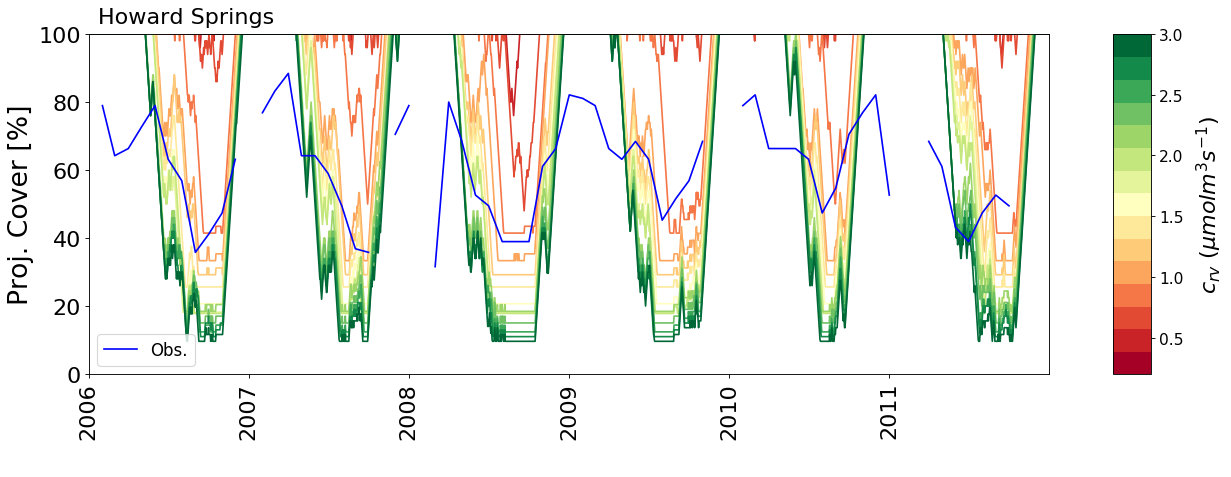

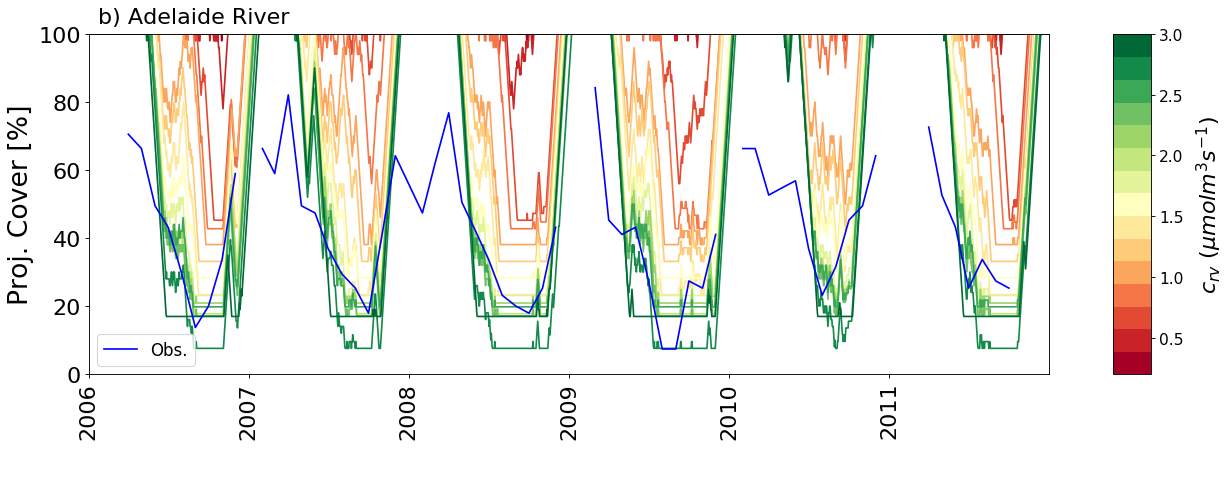

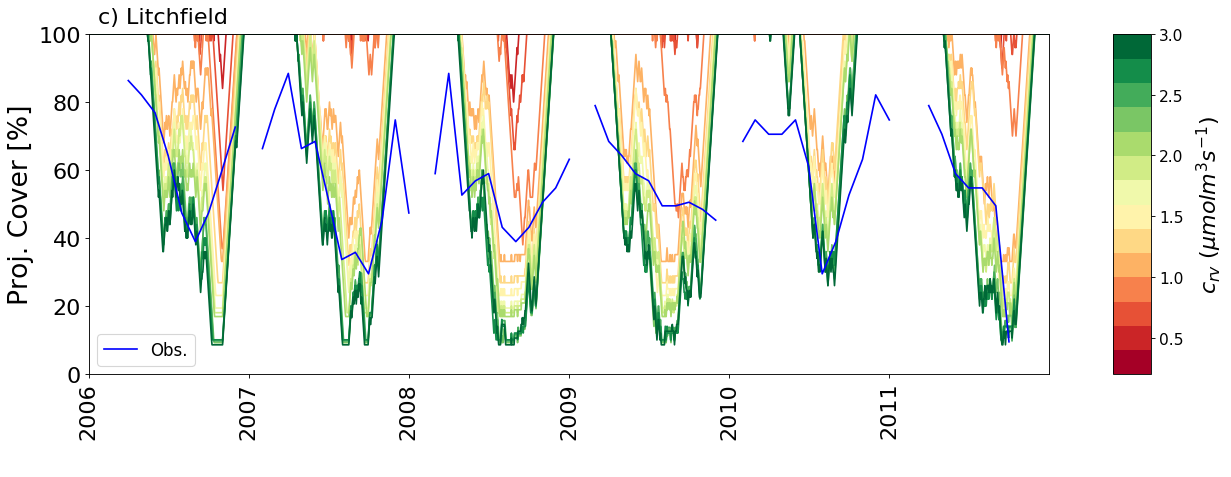

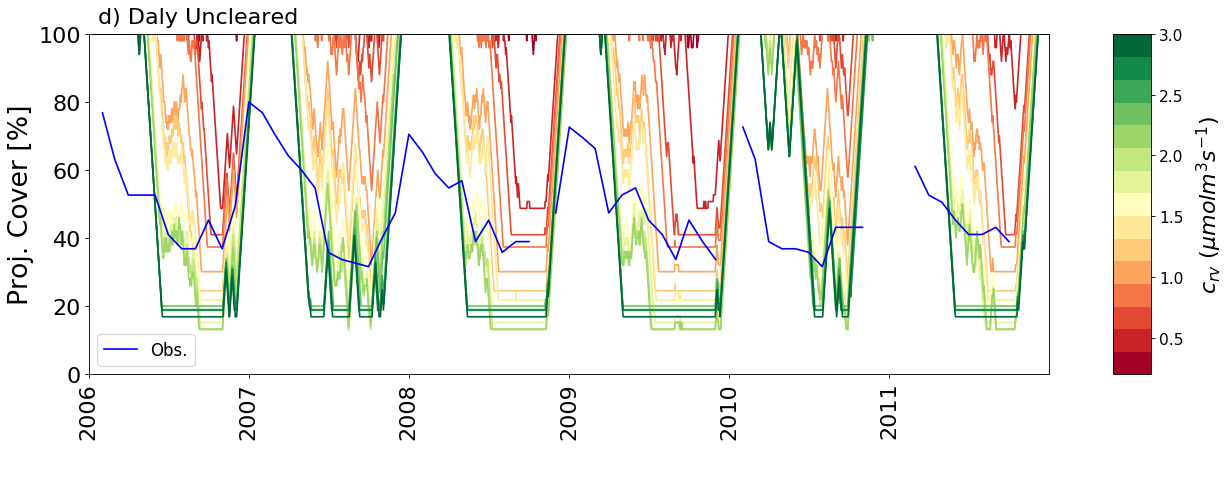

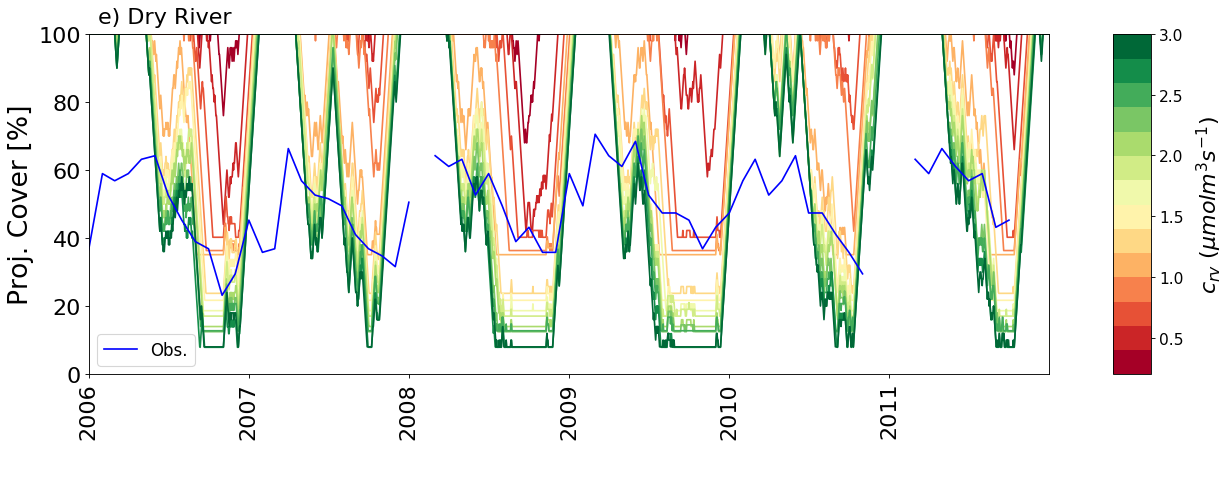

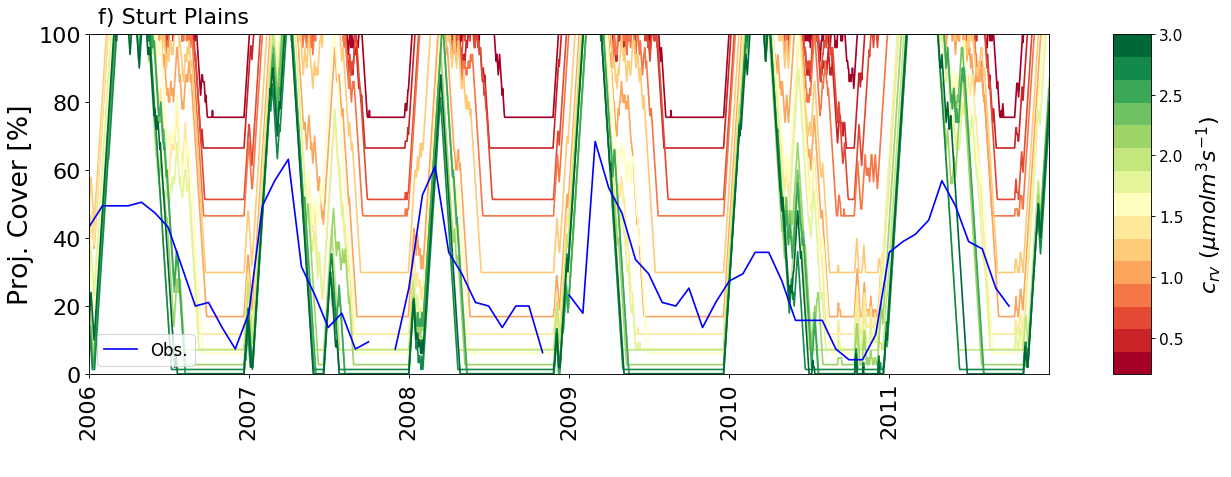

In [6]:
#HowardSprings
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_howard_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "Howard Springs" --legend True --cbar_max 3.0 \
--palette RdYlGn


#AdelaideRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_adelaide_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "b) Adelaide River" --legend True --cbar_max 3.0 \
--palette RdYlGn

#Litchfield
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_litchfield_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "c) Litchfield" --legend True --cbar_max 3.0 \
--palette RdYlGn

#DalyUncleared
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_daly_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "d) Daly Uncleared" --legend True --cbar_max 3.0 \
--palette RdYlGn

#DryRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_dry_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "e) Dry River" --legend True --cbar_max 3.0 \
--palette RdYlGn

#SturtPlains
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_sturt_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--plot_cbar True --cblabel "$c_{rv}$ ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "f) Sturt Plains" --legend True --cbar_max 3.0 \
--palette RdYlGn

**Figure S3.4.** Timeseries of total vegetation cover (perennial trees and seasonal grasses) for the different sites (a-f) with in blue the fPar-based observations and the VOM-results for different values of the costfactor for water transport (color scale). The timing of the declining and rising limbs of the curves seem to match with the observations, but a the different values of the costfactor show especially during the dry season s trong sensitivity (i.e. the minimum vegetation cover varies strongly).  

## Effect on parameter values

<Figure size 1280x400 with 0 Axes>

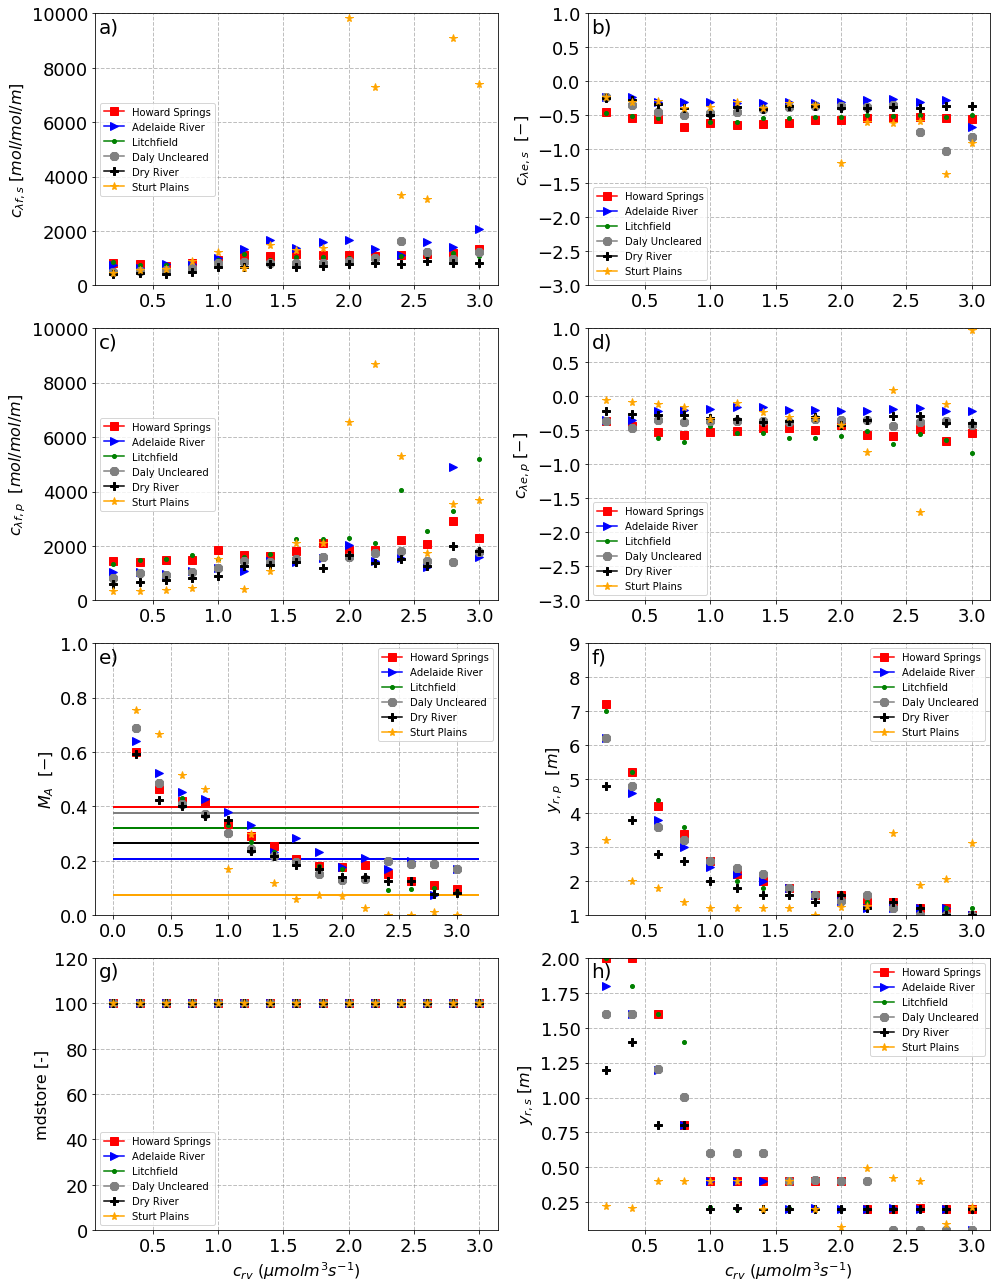

In [7]:
#plot parameters
cpcff_vals = np.arange(0.2, 3.2, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]
site_name = ["Howard Springs", "Adelaide River", "Litchfield", "Daly Uncleared", "Dry River", "Sturt Plains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 


symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18)) 
ax = axes.flat

i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                  "/best/input/pars.txt")
            

            for i in range(0,8):
                if(i_cpcff ==0):
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site_name[ibasin])     
                else:
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                if(i == 4):
                    ax[i].hlines( cai_fpar[ibasin], 0, 3.2, color = colors[ibasin] )

                    
                for tick in ax[i].xaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
                for tick in ax[i].yaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
                ax[i].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

                    
                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
        
ax[0].set_ylabel(r"$c_{\lambda f,s}$ $[mol/mol/m ]$", size=16 )  
ax[0].set_ylim( 0, 10000  )    
ax[0].legend(prop={'size':10}, loc='center left')
ax[0].text(0.01, 0.95, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
    
ax[1].set_ylabel(r"$c_{\lambda e,s}$  $[-]$", size=16 )  
ax[1].set_ylim( -3, 1  )    
ax[1].legend(prop={'size':10})
ax[1].text(0.01, 0.95, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)
 
ax[2].set_ylabel(r"$c_{\lambda f,p}$  $[mol/mol/m ]$", size=16 )
ax[2].set_ylim( 0, 10000  )    
ax[2].legend(prop={'size':10}, loc='center left')
ax[2].text(0.01, 0.95, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)

ax[3].set_ylabel(r"$c_{\lambda e,p}$ $[-]$", size=16 ) 
ax[3].set_ylim( -3, 1  )    
ax[3].legend(prop={'size':10})
ax[3].text(0.01, 0.95, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)

ax[4].set_ylabel(r"$M_A$  $[-]$", size=16 )  
ax[4].set_ylim( 0, 1  )    
ax[4].legend(prop={'size':10})
ax[4].text(0.01, 0.95, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)

ax[5].set_ylabel(r"$y_{r,p}$  $[m]$", size=16 )  
ax[5].set_ylim( 1, 9  )    
ax[5].legend(prop={'size':10})
ax[5].text(0.01, 0.95, "f)", ha='left', va='center', transform=ax[5].transAxes, fontsize=20)

ax[6].set_ylabel("mdstore [-]", size=16 )  
ax[6].set_xlabel("$c_{rv}$ ($\mu mol m^3 s^{-1})$", size=16 )  
ax[6].set_ylim( 0, 120  )    
ax[6].legend(prop={'size':10})
ax[6].text(0.01, 0.95, "g)", ha='left', va='center', transform=ax[6].transAxes, fontsize=20)

ax[7].set_ylabel(r"$y_{r,s}$ $[m]$", size=16 )  
ax[7].set_xlabel("$c_{rv}$ ($\mu mol m^3 s^{-1})$", size=16 )  
ax[7].set_ylim( 0.05, 2  )    
ax[7].legend(prop={'size':10})
ax[7].text(0.01, 0.95, "h)", ha='left', va='center', transform=ax[7].transAxes, fontsize=20)



plt.tight_layout()
    
plt.show()




**Figure S3.5.** Optimal vegetation parameters for the different values of the water transport costfactor c$_{rv}$, for a) and b) the two parameters $c_{\lambda f,s}$ and  $c_{\lambda e,s}$ effecting the water use for perennial vegetation, c) and d) the two parameters $c_{\lambda f,p}$ and $c_{\lambda e,p}$ effecting the water use for seasonal vegetation, e) vegetation cover of the perennial vegetation $M_{A,p}$, f) the rooting depth for the perennial vegetation $y_{r,p}$ and g) the plant water storage (fixed) and h) the rooting depth for the seasonal vegetation $y_{r,s}$. The lines for the parameter $M_{A,p}$ indicate the minimum vegetation cover during the dry season derived from fPar-values. 

<Figure size 1280x1040 with 0 Axes>

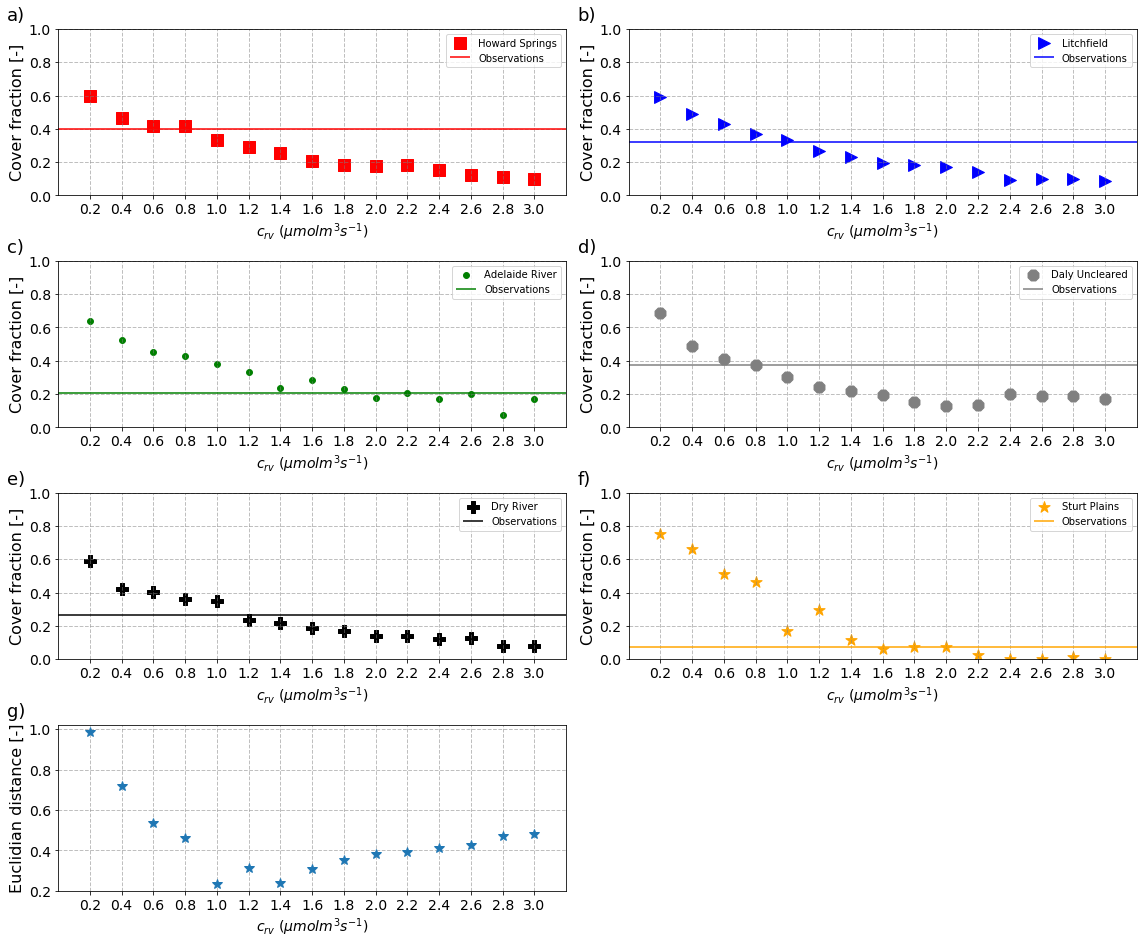

In [8]:
#plot parameters
cpcff_vals = np.arange(0.2,3.2, 0.2)
study_sites = ["HowardSprings", "Litchfield", "AdelaideRiver",  "DalyUncleared", "DryRiver", "SturtPlains" ]
site_name = ["Howard Springs", "Litchfield", "Adelaide River",  "Daly Uncleared", "Dry River", "Sturt Plains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.32000000000000006, #Litchfield
0.20771929824561405, #AdelaideRiver
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']
fig_lab = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)']

fig=plt.figure(figsize=(16, 13), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 13)) 
fig.delaxes(axes[3,1])
ax = axes.flat


i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")

            cai = params[4]
                
            err[i_cpcff, ibasin] = cai - cai_fpar[ibasin]
                          
            if(i_cpcff ==0):
                ax[ibasin].scatter(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , s=140, label=site_name[ibasin])     
                #ax[ibasin].plot(0.02, cai_fpar[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                ax[ibasin].hlines( cai_fpar[ibasin], 0, 3.2, color = colors[ibasin],label = "Observations" )
                ax[ibasin].text(-0.10, 1.05, fig_lab[ibasin], transform=ax[ibasin].transAxes, size=18)
            else:
                ax[ibasin].scatter(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , s=140)     

                
            ax[ibasin].set_ylabel("Cover fraction [-]", size=16 )  
            ax[ibasin].set_ylim( 0, 1  ) 
            ax[ibasin].set_xlim( 0, 3.2  )    

            ax[ibasin].legend(prop={'size':10})
            #if(ibasin > 3):
                #ax[ibasin].set_xlabel("cpcff [-]", size=16 )  
            ax[ibasin].set_xlabel("$c_{rv}$ ($\mu mol m^3 s^{-1})$", size=14 )  

            
            #ax[0].text(-0.07, 1.02, "a)", transform=ax[0].transAxes, 
            #            size=20, weight='bold')
            ax[ibasin].tick_params(axis='both', which='major', labelsize=14)
            ax[ibasin].set_xticks(cpcff_vals)
            ax[ibasin].set_xticklabels(cpcff_str)
            ax[ibasin].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

                
                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
    
#combining the errors
for i_cpcff in range(len(cpcff_str)):
    ED[i_cpcff] = np.sqrt(np.sum(err[i_cpcff,:]**2))

ax[6].plot(cpcff_vals, ED, "*", markersize=10)
ax[6].set_ylabel("Euclidian distance [-]", size = 16 )  
#ax[1].set_ylim( 1, 9  )
ax[6].set_xlim( 0, 3.2  )    

#ax[6].legend(prop={'size':10})
ax[6].text(-0.10, 1.05, fig_lab[ibasin], transform=ax[6].transAxes, 
            size=18)
ax[6].tick_params(axis='both', which='major', labelsize=14)
ax[6].set_xticks(cpcff_vals)
ax[6].set_xticklabels(cpcff_str)
ax[6].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[6].set_xlabel("$c_{rv}$ ($\mu mol m^3 s^{-1})$", size=14 )  


plt.tight_layout() 
plt.show()




**Figure 3.6.** Optimal vegetation parameters for the different values of the water transport costfactor c$_{rv}$. The lines indicate the minimum vegetation cover during the dry season derived from fPar-values. Also here, it can be seen that values between 0.4 $\mu mol/m^3/s$ and 1.8 $\mu mol/m^3/s$ reproduce best the vegetation cover (HowardSprings = 0.4 $\mu mol/m^3/s$, AdelaideRiver =  1.8 $\mu mol/m^3/s$, Litchfield =  1.0 $\mu mol/m^3/s$, DalyUncleared =  0.8 $\mu mol/m^3/s$, DryRiver =  1.2 $\mu mol/m^3/s$, SturtPlains =  1.2 $\mu mol/m^3/s$).

<Figure size 1280x1040 with 0 Axes>

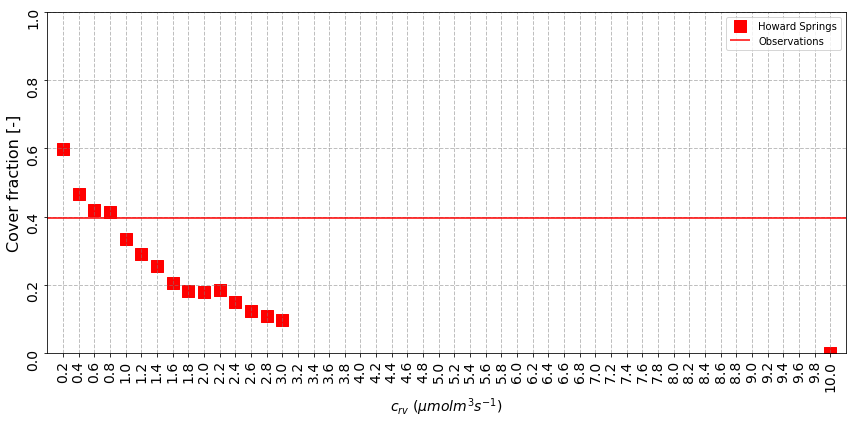

In [9]:
#plot parameters
cpcff_vals = np.arange(0.2,3.2, 0.2)
tick_vals = np.arange(0.2,10.2, 0.2)

cpcff_vals = np.append(cpcff_vals, 10.0)
study_sites = ["HowardSprings" ]
site_name = ["Howard Springs" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

tick_str = map(str, np.round(tick_vals,1) ) 
tick_str = list(tick_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.32000000000000006, #Litchfield
0.20771929824561405, #AdelaideRiver
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']
fig_lab = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)']

fig=plt.figure(figsize=(16, 13), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), squeeze=False) 
ax = axes.flat


i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")

            cai = params[4]
                
            err[i_cpcff, ibasin] = cai - cai_fpar[ibasin]
                          
            if(i_cpcff ==0):
                ax[ibasin].scatter(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , s=140, label=site_name[ibasin])     
                #ax[ibasin].plot(0.02, cai_fpar[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                ax[ibasin].hlines( cai_fpar[ibasin], 0, 10.2, color = colors[ibasin],label = "Observations" )
                #ax[ibasin].text(-0.10, 1.05, fig_lab[ibasin], transform=ax[ibasin].transAxes, size=18)
            else:
                ax[ibasin].scatter(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , s=140)     

                
            ax[ibasin].set_ylabel("Cover fraction [-]", size=16 )  
            ax[ibasin].set_ylim( 0, 1  ) 
            ax[ibasin].set_xlim( 0, 10.2  )    

            ax[ibasin].legend(prop={'size':10})
            #if(ibasin > 3):
                #ax[ibasin].set_xlabel("cpcff [-]", size=16 )  
            ax[ibasin].set_xlabel("$c_{rv}$ ($\mu mol m^3 s^{-1})$", size=14 )  

            
            #ax[0].text(-0.07, 1.02, "a)", transform=ax[0].transAxes, 
            #            size=20, weight='bold')
            ax[ibasin].tick_params(axis='both', which='major', labelsize=14, rotation=90)
            ax[ibasin].set_xticks(tick_vals)
            ax[ibasin].set_xticklabels(tick_str)
            ax[ibasin].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

                
                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
    
#combining the errors



plt.tight_layout() 
plt.show()




**Figure 3.7.** Optimal vegetation parameters for an extended range (untill 10 $\mu mol/m^3/s$) of the water transport costfactor c$_{rv}$ for Howard Springs. The lines indicate the minimum vegetation cover during the dry season derived from fPar-values. 

## Relation with climate characteristics

Constant cover:0.3971929824561404
Constant cover:0.32000000000000006
Constant cover:0.20771929824561405
Constant cover:0.37473684210526315
Constant cover:0.26616541353383455
Constant cover:0.07443609022556391


<Figure size 1280x400 with 0 Axes>

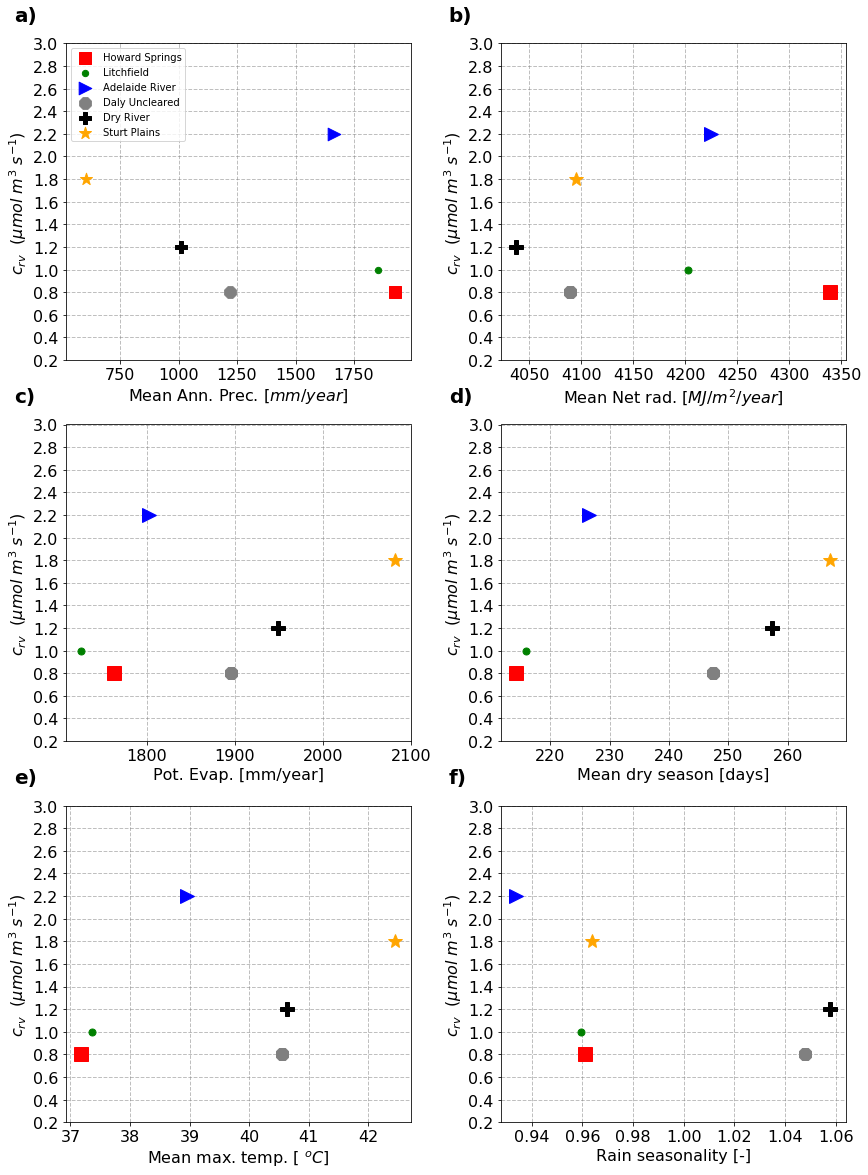

In [2]:
%run ../../src_py/plot_costs_climates.py \
--sites "Howard Springs" "Litchfield" "Adelaide River" "Daly Uncleared" "Dry River" "Sturt Plains" \
--cpccf_min 0.2 --cpccf_max 3.0 --cpccf_step 0.2 \
--in1 ../../work/HowardSprings/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff3.0/best/input/pars.txt \
--in2 ../../work/Litchfield/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/Litchfield/freedrainage_cpcff3.0/best/input/pars.txt \
--in3 ../../work/AdelaideRiver/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff3.0/best/input/pars.txt \
--in4 ../../work/DalyUncleared/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff3.0/best/input/pars.txt \
--in5 ../../work/DryRiver/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff3.0/best/input/pars.txt \
--in6 ../../work/SturtPlains/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff3.0/best/input/pars.txt \
--fpar1 ../../data/fPAR/fpar_howard_v5.txt --fpar2 ../../data/fPAR/fpar_litchfield_v5.txt \
--fpar3 ../../data/fPAR/fpar_adelaide_v5.txt --fpar4 ../../data/fPAR/fpar_daly_v5.txt --fpar5 ../../data/fPAR/fpar_dry_v5.txt \
--fpar6 ../../data/fPAR/fpar_sturt_v5.txt --fpar_dates ../../data/fPAR/dates_v5 \
--weather1 ../../data/VOM_input/HowardSprings/dailyweather.prn \
--weather2 ../../data/VOM_input/Litchfield/dailyweather.prn \
--weather3 ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--weather4 ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--weather5 ../../data/VOM_input/DryRiver/dailyweather.prn \
--weather6 ../../data/VOM_input/SturtPlains/dailyweather.prn \
--startyear 1995 --endyear 2005 \
--lat1 -12.5 \
--lat2 -13.1790 \
--lat3 -13.077 \
--lat4 -14.1592 \
--lat5 -15.258983 \
--lat6 -17.1507 \
--silo1 ../../data/Silo/howard.txt \
--silo2 ../../data/Silo/litchfield.txt \
--silo3 ../../data/Silo/adelaide.txt \
--silo4 ../../data/Silo/daly.txt \
--silo5 ../../data/Silo/dry.txt \
--silo6 ../../data/Silo/sturt.txt


**Figure 3.8.** Selected costfactor for the watertransport system (cpcff) for each study site versus several climatic indeces, with a) mean annual precipitation, b) mean net radiation, c) aridity, d) mean length of the dry season, e) mean maximum temperature and f) mean rainfall seasonality.

## Influence on NCP

<Figure size 1280x400 with 0 Axes>

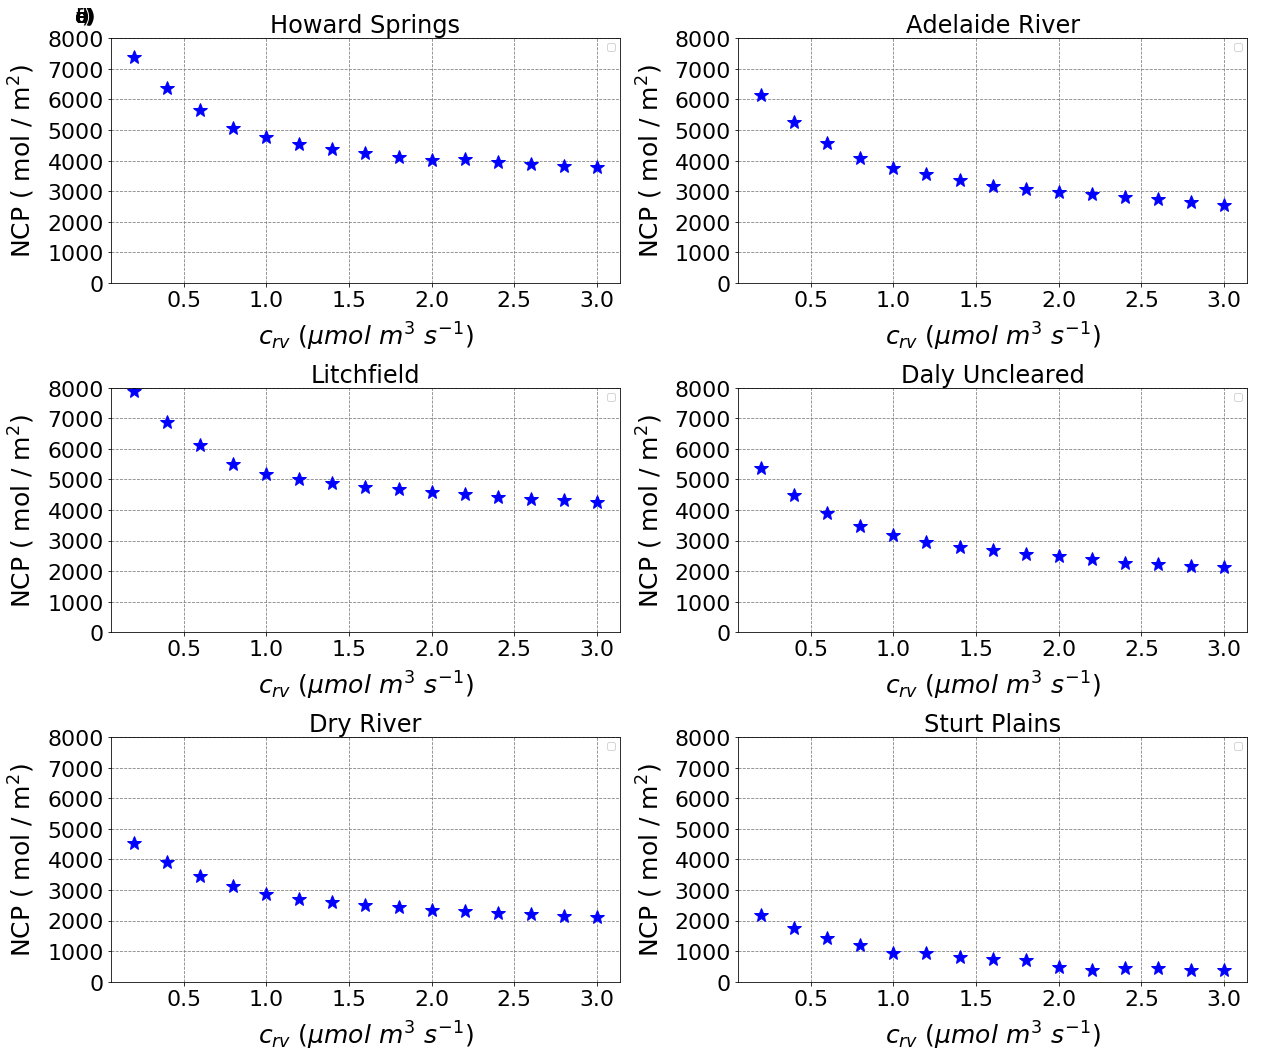

In [23]:

#load data
cpcff_vals = np.arange(0.2, 3.2, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]
site_names = ["Howard Springs", "Adelaide River", "Litchfield", "Daly Uncleared", "Dry River", "Sturt Plains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)
fig_lab = ["a)", "b)", "c)", "d)" , "e)", "f)"]

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, axes   = plt.subplots(nrows=3, ncols=2, figsize=(18, 15)) 
ax = axes.flat

i = 0

skipped = 0
#loop over all sites
for site in study_sites:
  
    
    loc = 1
    i_cpcff = 0
    NCPmax = 0
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        

            infile = ["../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_best/results_daily.txt"]
            #get NCP-value
            data = np.genfromtxt(infile[0], names=True)
            
            NCP = np.sum(data["ncp_g"]) + np.sum(data["ncp_t"])
                
            if(loc  == 1):
                ax[i].plot(cpcff_vals[i_cpcff], NCP, '*b', markersize=15 )
            else:
                ax[i].plot(cpcff_vals[i_cpcff], NCP, '*b', markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
    ax[i].set_title(site_names[i], size=24  );

    ax[i].grid(b=True, which='major', color='grey', linestyle='--')
    ax[i].set_ylabel('NCP ( mol / m$^2$)', size = 25, labelpad=10)
    ax[i].set_xlabel(r'$c_{rv}$ ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=10)
    ax[i].set_ylim(0,8000)

    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    ax[i].legend()
    ax[i].text(-0.07, 1.07, fig_lab[i], transform=ax[0].transAxes,  size=20)


    i = i +1


fig.add_subplot(111, frameon=False);
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.tight_layout()
plt.show()



**Figure 3.9.** Values of the costfactor c$_{rv}$ agains several the Net Carbon Profit (NCP) for with a) Howard Springs, b) Adelaide River, c) Litchfield, d) Daly Uncleared, c) Dry River, d) Sturt Plains. The NCP-values initially decrease strongly. For higher values, there decrease is less strong, but the NCP seems to keep going down. 

## Influence on fluxes

<Figure size 1280x400 with 0 Axes>

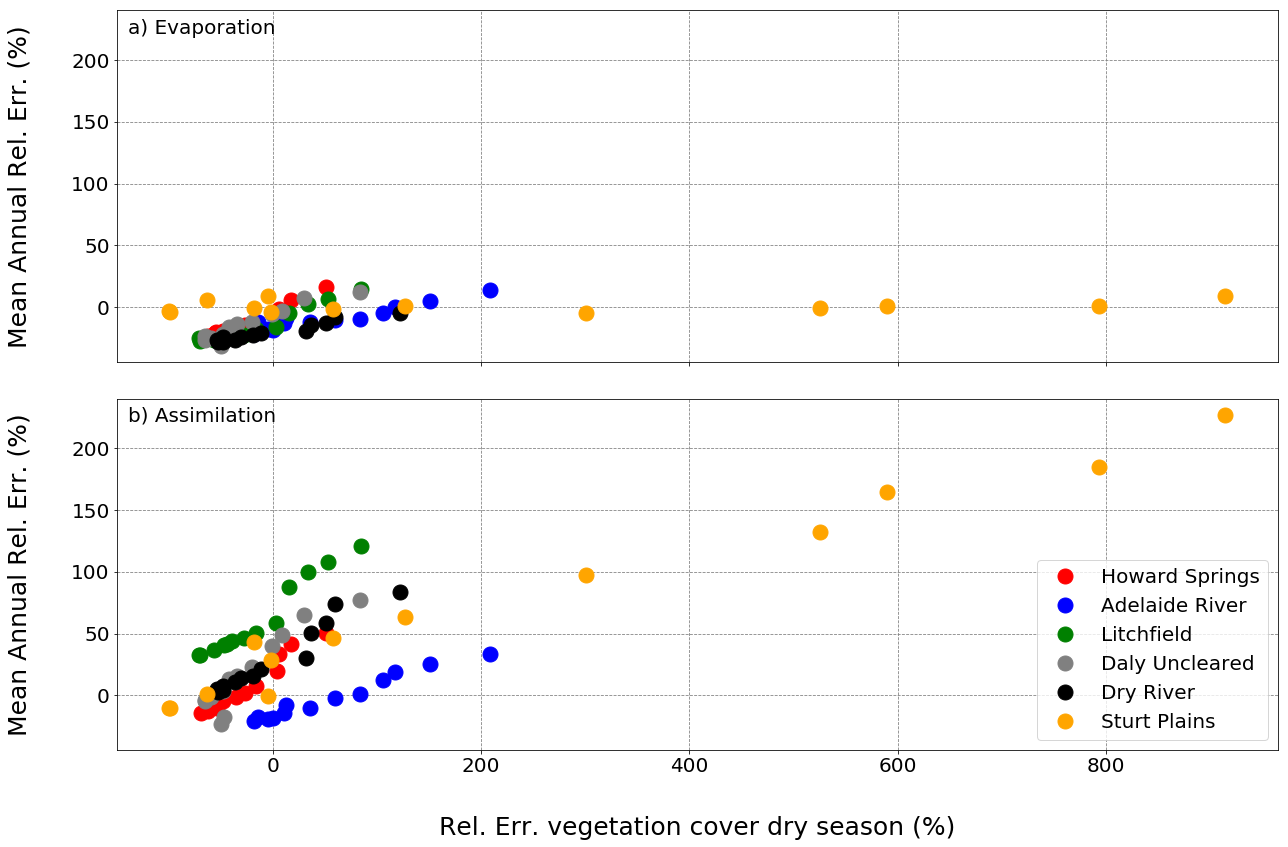

In [24]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]
site_names = ["Howard Springs", "Adelaide River", "Litchfield", "Daly Uncleared", "Dry River", "Sturt Plains" ]

colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=2, ncols=1, figsize=(18, 12), sharex=True, sharey=True)   


i = 0

skipped = 0
#loop over all sites
for site in study_sites:

    loc = 1
    i_cpcff = 0
    NCPmax = 0  

    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        

            if(cpcff == "1.0"):
                params = np.loadtxt("../../data/VOM_output/"+  site  +"/freedrainage_cpcff" + label +
                      "/sce_best/pars.txt")
            else:
                params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + label +
                      "/best/input/pars.txt")

            cai = params[4]
            err[i_cpcff, i] = 100*(cai - cai_fpar[i])/cai_fpar[i]
            
           
                
            if(loc  == 1):
                ax[0].plot(err[i_cpcff, i], ebest_stats[1]*100, 'o', color=colors[i] , markersize=15, label=sites_name[i] ) 
                ax[1].plot(err[i_cpcff, i], assbest_stats[1]*100, 'o', color=colors[i] , markersize=15, label=sites_name[i] ) 
            else:
                ax[0].plot(err[i_cpcff, i], ebest_stats[1]*100, 'o', color=colors[i], markersize=15 ) 
                ax[1].plot(err[i_cpcff, i], assbest_stats[1]*100, 'o', color=colors[i] , markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
       
    i = i +1

ax[0].grid(b=True, which='major', color='grey', linestyle='--')
ax[1].grid(b=True, which='major', color='grey', linestyle='--')

for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
ax[0].text(0.01, 0.95, "a) Evaporation", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
ax[1].text(0.01, 0.95, "b) Assimilation", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

ax[1].set_xlabel(r'Rel. Err. vegetation cover dry season (%)', size = 25, labelpad=40)
ax[0].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[1].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.legend(loc='lower right', fontsize = 20)
plt.tight_layout()
plt.show()

    


**Figure 3.10.** The relative errors of the mean annual fluxes a) evaporation and b) assimilation versus the relative errors for the projective cover, for the different values of the costfactor c$_{rv}$. It can be seen that a larger error in vegetation cover during the dry season also leads to a large error in the resulting fluxes. 